In [1]:
import pandas as pd
#
pd.options.display.float_format = '{:,.2f}'.format  # two decimals and commas

In [2]:
sales = pd.read_csv(r'./data/sales_02_01.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


In [4]:
# 
cat_cols = sales.columns[sales.dtypes == 'object']
num_cols = sales.columns[sales.dtypes != 'object']

In [5]:
sales[cat_cols].isnull().sum()

Product line         0
Product type         0
Product              0
Order method type    0
Retailer country     0
dtype: int64

In [6]:
sales[num_cols].isna().sum()

Year                   0
Revenue            11778
Planned revenue    11778
Product cost       11778
Quantity           11963
Unit cost          11778
Unit price         11778
Gross profit       11778
Unit sale price    11778
dtype: int64

In [7]:
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,"5,819.70","6,586.16","1,733.20",619.00,2.80,10.64,"4,086.50",5.11
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,"10,904.28","11,363.52","2,990.40","1,068.00",2.80,10.64,"7,913.88",10.21
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,"27,987.84","28,855.68","7,593.60","2,712.00",2.80,10.64,"20,394.24",10.32
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Unique Categorical values
main_columns = ("Year","Product line", "Product type", "Retailer country", "Order method type")
for col in main_columns:
    print("Column %s: unique values: %s" %  (col, sales[col].unique()))

Column Year: unique values: [2004 2005 2006 2007]
Column Product line: unique values: ['Golf Equipment' 'Camping Equipment' 'Outdoor Protection'
 'Mountaineering Equipment']
Column Product type: unique values: ['Golf Accessories' 'Sleeping Bags' 'Cooking Gear' 'First Aid'
 'Insect Repellents' 'Climbing Accessories']
Column Retailer country: unique values: ['United States' 'United Kingdom' 'Canada' 'Mexico' 'Brazil' 'Japan'
 'Korea' 'China' 'Singapore' 'Australia' 'Netherlands' 'Sweden' 'Finland'
 'Denmark' 'France' 'Germany' 'Belgium' 'Switzerland' 'Austria' 'Italy'
 'Spain']
Column Order method type: unique values: ['Sales visit' 'Telephone' 'Web' 'Special' 'Mail' 'E-mail' 'Fax']


In [9]:
# Numerical values overview
sales[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,"17,823.00","2,005.16",0.96,"2,004.00","2,004.00","2,005.00","2,006.00","2,007.00"
Revenue,"6,045.00","103,845.48","183,604.24",0.00,"13,649.24","41,541.19","112,002.56","3,644,349.30"
Planned revenue,"6,045.00","105,892.31","188,127.36",0.00,"13,837.36","41,895.71","114,475.76","3,477,909.78"
Product cost,"6,045.00","57,019.32","111,784.63",33.60,"5,759.76","19,067.20","57,960.00","2,061,750.00"
Quantity,"5,860.00","4,691.27","8,950.96",5.00,625.00,"1,695.00","4,858.00","164,142.00"
Unit cost,"6,045.00",58.88,348.37,0.85,2.76,9.00,34.97,"7,833.00"
Unit price,"6,045.00",48.90,62.81,3.66,7.00,18.00,66.77,265.14
Gross profit,"6,045.00","43,362.03","71,858.31","-13,365.60","7,009.65","18,946.53","50,023.08","1,416,159.78"
Unit sale price,"6,045.00",44.80,58.40,0.00,6.58,17.65,62.76,265.14


In [10]:
# But year is a categorical value so lets see how many rows we have
sales['Year'].value_counts()

2004    5451
2005    5451
2006    5451
2007    1470
Name: Year, dtype: int64

In [11]:
# Sales insights by country
sales.groupby('Retailer country')[['Revenue',\

                                   'Planned revenue',\

                                   'Product cost',\

                                   'Quantity',\

                                   'Gross profit']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Retailer country,,,,,
Australia,"15,264,219.45","15,528,551.26","8,367,046.10","649,467.00","6,384,806.59"
Austria,"16,314,187.41","16,639,182.90","8,923,176.61","719,084.00","6,871,597.34"
Belgium,"14,152,986.00","14,347,134.58","7,695,759.79","622,150.00","5,964,513.37"
Brazil,"16,866,861.92","17,186,250.76","9,210,809.34","744,353.00","7,092,849.29"
Canada,"39,183,713.98","39,755,474.14","21,435,997.54","1,701,123.00","16,670,505.63"
China,"43,502,343.47","44,323,471.84","23,925,152.71","1,935,454.00","18,003,637.37"
Denmark,"8,455,456.71","8,657,222.76","4,695,594.80","368,479.00","3,496,915.24"
Finland,"27,145,284.20","27,687,052.15","14,879,340.33","1,207,265.00","11,335,187.27"
France,"35,953,671.70","36,403,358.11","19,646,425.37","1,620,252.00","14,968,952.89"


In [12]:
# Sales insights by Product line
sales.groupby(['Retailer country','Product line'])[['Revenue',\

                                   'Planned revenue',\

                                   'Product cost',\

                                   'Quantity',\

                                   'Gross profit']].sum()

Revenue  Planned revenue  \
Retailer country Product line                                              
Australia        Camping Equipment        12,173,115.04    12,427,308.26   
                 Golf Equipment              917,663.02       896,981.01   
                 Mountaineering Equipment  1,549,331.21     1,564,581.64   
                 Outdoor Protection          624,110.18       639,680.35   
Austria          Camping Equipment        12,673,314.57    12,966,352.82   
...                                                 ...              ...   
United Kingdom   Outdoor Protection        3,035,610.16     2,991,604.60   
United States    Camping Equipment        84,025,605.48    86,373,805.08   
                 Golf Equipment            6,740,476.62     7,481,675.61   
                 Mountaineering Equipment  8,389,625.68     8,330,836.11   
                 Outdoor Protection        8,389,494.19     8,305,302.37   

                                           Product cost     Quantity  \
Retailer country Product line                                          
Australia        Camping Equipment         7,074,419.54   406,458.00   
                 Golf Equipment              325,653.21    51,698.00   
                 Mountaineering Equipment    743,029.95   108,038.00   
                 Outdoor Protection          223,943.40    83,273.00   
Austria          Camping Equipment         7,421,285.77   410,917.00   
...                                                 ...          ...   
United Kingdom   Outdoor Protection        1,143,999.84   393,145.00   
United States    Camping Equipment        49,849,650.57 2,464,429.00   
                 Golf Equipment            2,571,049.97   401,028.00   
                 Mountaineering Equipment  4,000,927.54   580,913.00   
                 Outdoor Protection        3,147,568.06 1,103,217.00   

                                           Gross profit  
Retailer country Product line                            
Australia        Camping Equipment         4,674,279.14  
                 Golf Equipment              535,917.73  
                 Mountaineering Equipment    783,038.79  
                 Outdoor Protection          391,570.93  
Austria          Camping Equipment         4,822,428.41  
...                                                 ...  
United Kingdom   Outdoor Protection        1,789,051.65  
United States    Camping Equipment        31,418,743.83  
                 Golf Equipment            4,169,426.65  
                 Mountaineering Equipment  4,172,501.35  
                 Outdoor Protection        4,953,950.22  

[84 rows x 5 columns]

In [13]:
sales.groupby(['Retailer country','Product line'])[['Revenue','Planned revenue','Product cost','Quantity','Gross profit']].sum()

Revenue  Planned revenue  \
Retailer country Product line                                              
Australia        Camping Equipment        12,173,115.04    12,427,308.26   
                 Golf Equipment              917,663.02       896,981.01   
                 Mountaineering Equipment  1,549,331.21     1,564,581.64   
                 Outdoor Protection          624,110.18       639,680.35   
Austria          Camping Equipment        12,673,314.57    12,966,352.82   
...                                                 ...              ...   
United Kingdom   Outdoor Protection        3,035,610.16     2,991,604.60   
United States    Camping Equipment        84,025,605.48    86,373,805.08   
                 Golf Equipment            6,740,476.62     7,481,675.61   
                 Mountaineering Equipment  8,389,625.68     8,330,836.11   
                 Outdoor Protection        8,389,494.19     8,305,302.37   

                                           Product cost     Quantity  \
Retailer country Product line                                          
Australia        Camping Equipment         7,074,419.54   406,458.00   
                 Golf Equipment              325,653.21    51,698.00   
                 Mountaineering Equipment    743,029.95   108,038.00   
                 Outdoor Protection          223,943.40    83,273.00   
Austria          Camping Equipment         7,421,285.77   410,917.00   
...                                                 ...          ...   
United Kingdom   Outdoor Protection        1,143,999.84   393,145.00   
United States    Camping Equipment        49,849,650.57 2,464,429.00   
                 Golf Equipment            2,571,049.97   401,028.00   
                 Mountaineering Equipment  4,000,927.54   580,913.00   
                 Outdoor Protection        3,147,568.06 1,103,217.00   

                                           Gross profit  
Retailer country Product line                            
Australia        Camping Equipment         4,674,279.14  
                 Golf Equipment              535,917.73  
                 Mountaineering Equipment    783,038.79  
                 Outdoor Protection          391,570.93  
Austria          Camping Equipment         4,822,428.41  
...                                                 ...  
United Kingdom   Outdoor Protection        1,789,051.65  
United States    Camping Equipment        31,418,743.83  
                 Golf Equipment            4,169,426.65  
                 Mountaineering Equipment  4,172,501.35  
                 Outdoor Protection        4,953,950.22  

[84 rows x 5 columns]

# Reshaping the data

In [14]:
cta = pd.read_csv('./data/CTA_comparison.csv')
cta.head()

,time,CTA Variant,views,sales
0,12:30:00,A,500,100
1,13:30:00,B,800,50
2,14:30:00,C,300,14
3,15:30:00,A,700,94
4,16:30:00,C,300,20


In [15]:
cta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         9 non-null      object
 1   CTA Variant  9 non-null      object
 2   views        9 non-null      int64 
 3   sales        9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [16]:
cta_views = cta.groupby(['CTA Variant', 'views']).count()

cta_views

time  sales
CTA Variant views             
A           500       2      2
            700       1      1
B           800       3      3
C           250       1      1
            300       2      2

In [17]:
h1 = cta_views.unstack(level = 'CTA Variant')
h1

time           sales          
CTA Variant    A    B    C     A    B    C
views                                     
250          NaN  NaN 1.00   NaN  NaN 1.00
300          NaN  NaN 2.00   NaN  NaN 2.00
500         2.00  NaN  NaN  2.00  NaN  NaN
700         1.00  NaN  NaN  1.00  NaN  NaN
800          NaN 3.00  NaN   NaN 3.00  NaN

In [18]:
h1.stack(1)

,,time,sales
views,CTA Variant,,
250,C,1.00,1.00
300,C,2.00,2.00
500,A,2.00,2.00
700,A,1.00,1.00
800,B,3.00,3.00


In [19]:
conv_rates = pd.read_csv('./data/conversion_rates.csv')

In [20]:
conv_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   converted  2000 non-null   int64 
 1   group      2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [21]:
conv_df = conv_rates.groupby('group').sum()
conv_df

,converted
group,
A,90
B,21


In [22]:
views_df =conv_rates.groupby('group').count().rename({'converted':'viewed'}, axis='columns')
views_df

,viewed
group,
A,1030
B,970


In [23]:
stats = views_df.merge(conv_df,on='group')
stats

,viewed,converted
group,,
A,1030,90
B,970,21


In [24]:
stats['conversion_ratio'] = 100*stats['converted']/stats['viewed']
stats

,viewed,converted,conversion_ratio
group,,,
A,1030,90,8.74
B,970,21,2.16


In [25]:
pd.options.display.float_format = '{:.2f}'.format
stats.stack()  # moves the column index viewed/converted/conversion_ratio) to the row

group                  
A      viewed             1030.00
       converted            90.00
       conversion_ratio      8.74
B      viewed              970.00
       converted            21.00
       conversion_ratio      2.16
dtype: float64

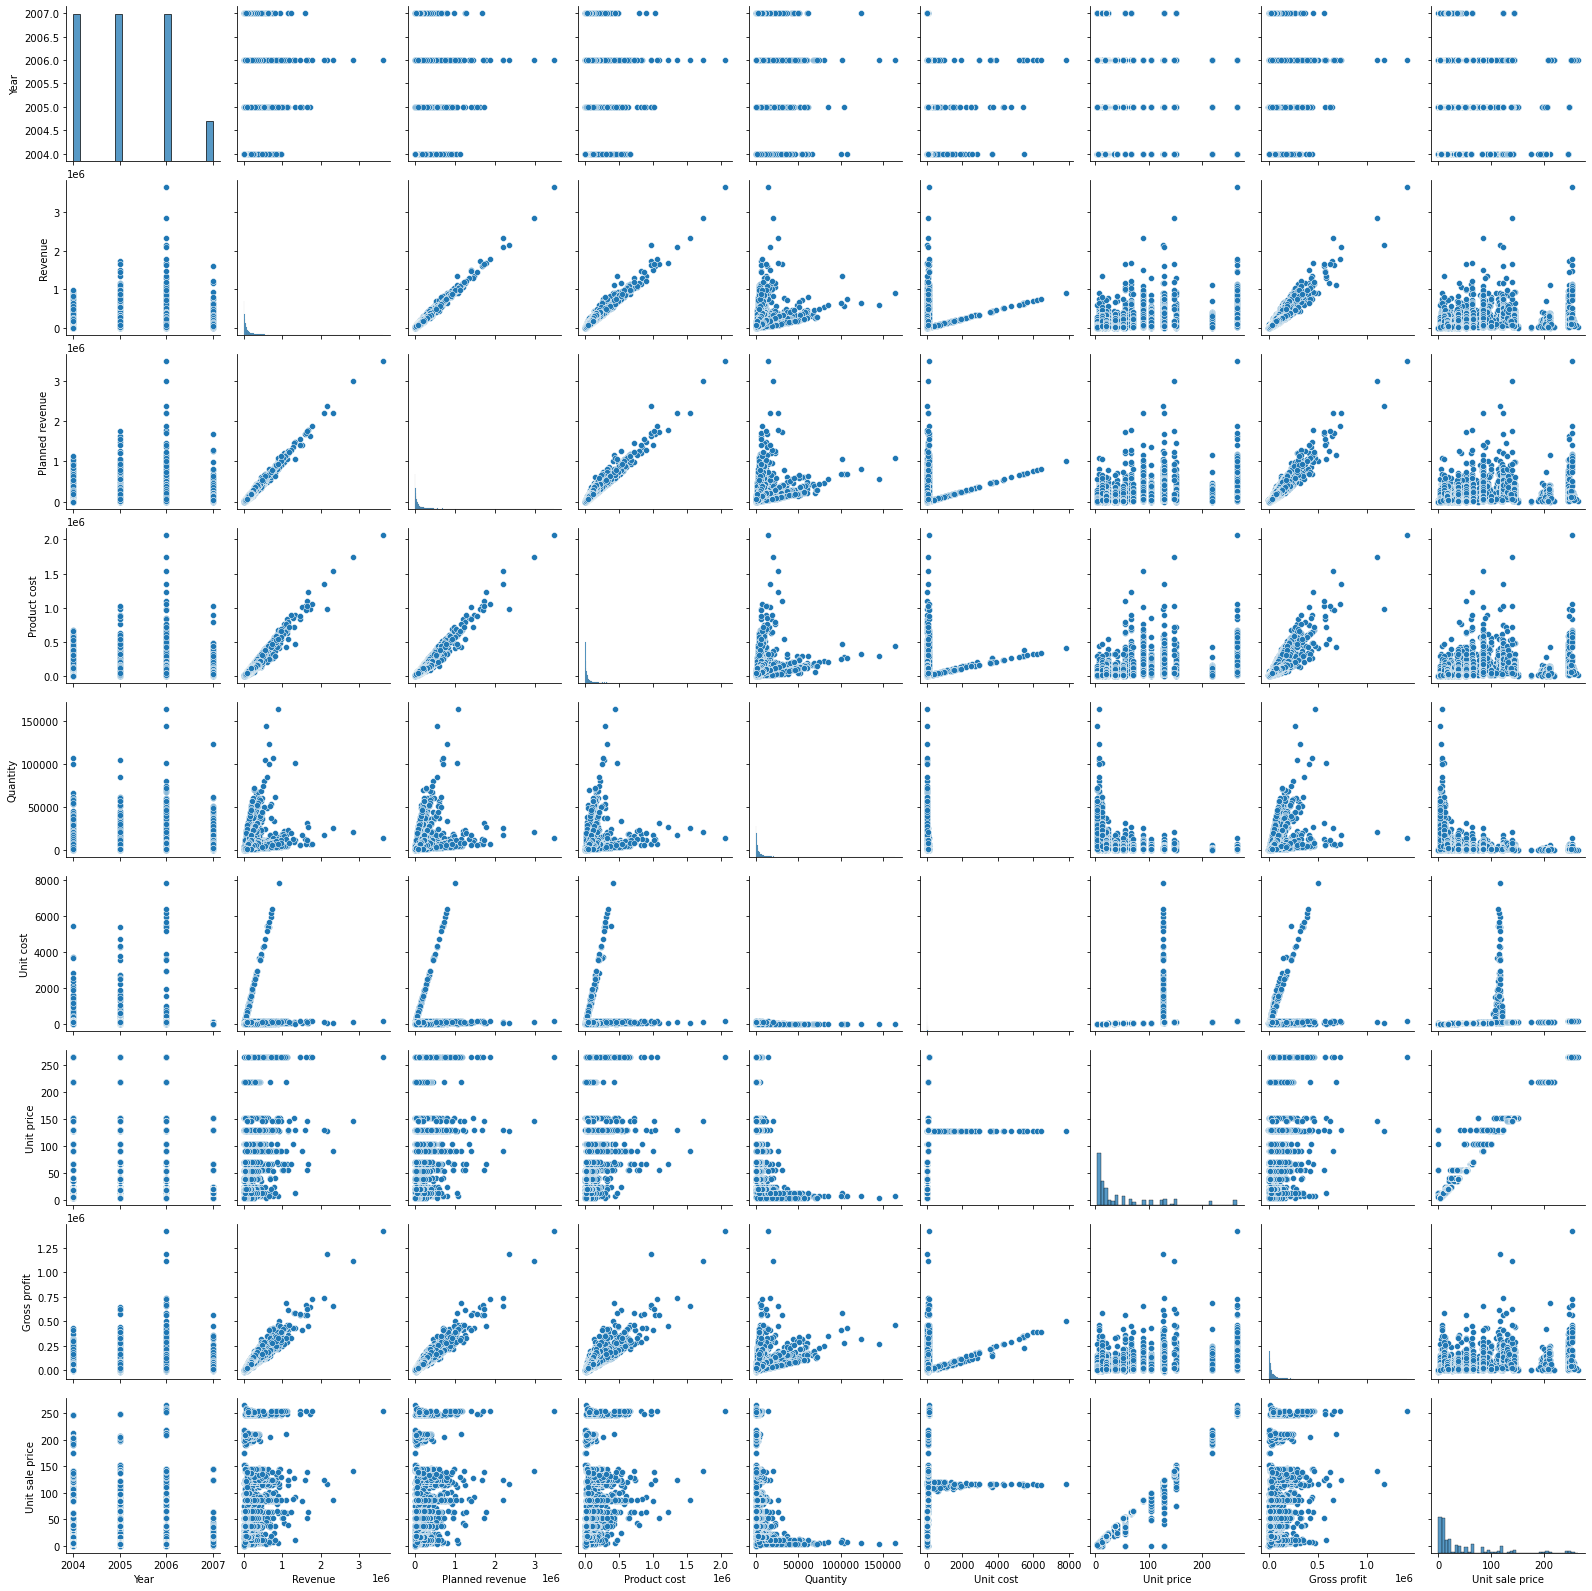

In [26]:
import seaborn as sns

sns.pairplot(sales, palette='gray')

In [27]:
sales['Revenue'][100:150]

100   32224.18
101   10268.40
102   32314.65
103        NaN
104   66278.36
105   14410.41
106        NaN
107   58738.13
108        NaN
109        NaN
110    9331.94
111   53442.26
112        NaN
113    3560.40
114        NaN
115   28380.00
116        NaN
117        NaN
118   34408.13
119   28714.89
120   46289.46
121   11438.82
122   41541.19
123        NaN
124   31213.50
125        NaN
126        NaN
127        NaN
128   61168.11
129    3849.17
130   10910.30
131   14354.45
132   17956.80
133        NaN
134   12414.96
135   26431.37
136   21908.67
137    5697.18
138        NaN
139        NaN
140        NaN
141        NaN
142   54872.68
143        NaN
144        NaN
145        NaN
146        NaN
147        NaN
148        NaN
149        NaN
Name: Revenue, dtype: float64